# Pandas For data Science: Using String Methods

Based on Pandas Practices by Kevin Markham at PYCON CLEVELAND 2018

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading Datastes

   - Dataset 1: Rhode Island Dataset from [Stanford Open Policing Project](https://openpolicing.stanford.edu/)

In [2]:
ri = pd.read_csv('police.csv')
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Exercise 5: During a search, how often is the driver frisked (Cacheado)?

___First Way___

In [3]:
# Search Type

ri['search_type'].value_counts(dropna= False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Protective Frisk,Reasonable Suspicion                          11
Incident t

In [4]:
# String Method: .contains('word')

ri['search_type'].str.contains('Frisk').value_counts(dropna= False)

NaN      88545
False     2922
True       274
Name: search_type, dtype: int64

In [5]:
# Percentage

ri['search_type'].str.contains('Frisk').value_counts(normalize= True)

False    0.914268
True     0.085732
Name: search_type, dtype: float64

### Exercise 6: How can we create a stop_year column from stop_date?

In [6]:
# String Method: .slice(from,to)

ri['stop_year'] = ri['stop_date'].str.slice(0,4)

In [7]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_year
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [8]:
stops_by_year = ri['stop_year'].value_counts(ascending = True)
stops_by_year

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_year, dtype: int64

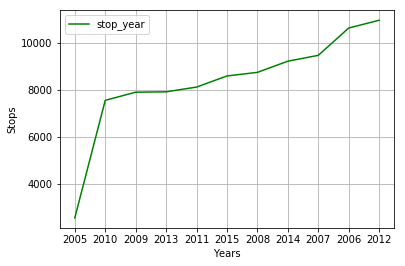

In [9]:
plt.plot(stops_by_year.index,stops_by_year,'g')
plt.xlabel('Years')
plt.ylabel('Stops')
plt.grid(True)
plt.legend()
plt.show()